In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle,islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import datetime

In [2]:
data = pd.read_csv('./data-cluster/minuto.csv')

In [3]:
data.shape

(1587257, 13)

In [4]:
data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [5]:
#we use 10%, selection 1 row beetwen 10 rows
filterPercentage_10 = (data['rowID'] % 10) == 0
sampled_df = data[filterPercentage_10]
sampled_df.shape

(158726, 13)

In [6]:
#Reverse Colums to Rows
sampled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,158726.0,793625.000000,458203.937509,0.00,396812.5,793625.00,1190437.50,1587250.00
air_pressure,158726.0,916.830161,3.051717,905.00,914.8,916.70,918.70,929.50
air_temp,158726.0,61.851589,11.833569,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,158680.0,162.156100,95.278201,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,158680.0,2.775215,2.057624,0.00,1.3,2.20,3.80,31.90
max_wind_direction,158680.0,163.462144,92.452139,0.00,68.0,187.00,223.00,359.00
max_wind_speed,158680.0,3.400558,2.418802,0.10,1.6,2.70,4.60,36.00
min_wind_direction,158680.0,166.774017,97.441109,0.00,76.0,180.00,212.00,359.00
min_wind_speed,158680.0,2.134664,1.742113,0.00,0.8,1.60,3.00,31.60
rain_accumulation,158725.0,0.000318,0.011236,0.00,0.0,0.00,0.00,3.12


In [7]:
#Detects rows with Rain acummulation and raind duration has value 0
filterRainsAccumulation = (sampled_df['rain_accumulation'] == 0)
filterRainsDuration = (sampled_df['rain_duration'] == 0)

sampled_df[filterRainsAccumulation].shape
sampled_df[filterRainsDuration].shape
del sampled_df['rain_accumulation']
del sampled_df['rain_duration']
#Deletes rows with values emptys
rows_before =  sampled_df.shape[0]
sampled_df = sampled_df.dropna()
rows_after = sampled_df.shape[0]
print('Who rows was deleted', rows_before - rows_after)

Who rows was deleted 46


In [8]:
#Checked de columns currently
sampled_df.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

In [9]:
#We are creating differents teams or features in this algorithm
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']
#Filter with columns or teams or features
select_df =  sampled_df[features]
#check columns
sampled_df.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

In [10]:
X = StandardScaler().fit_transform(select_df)

In [11]:
#Generate pointer into the Cluster
kmeans = KMeans(n_clusters = 10)
#Generate iterations
model = kmeans.fit(X)

In [12]:
#All center multidimentional
centers = model.cluster_centers_

In [13]:
def getCenters(_features,_centers):
    colNames = list(_features)
    colNames.append('prediction')
    Z = [np.append(A,index) for index, A in enumerate(_centers)]
    P = pd.DataFrame(Z,columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P

In [14]:
def showGrafic(data):
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
    plt.style.use("seaborn-dark")
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
    parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [15]:
allCenters = getCenters(features,centers)
allCenters

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,prediction
0,-0.185263,0.859332,-1.306764,-0.578478,-1.164891,-0.594077,-0.628706,0
1,-0.217990,0.594357,0.404172,0.667658,0.513269,0.609265,-0.156309,1
2,-0.221461,-1.074732,0.521718,-0.251930,0.672207,-0.248103,1.265371,2
3,0.317420,0.685497,1.345188,-0.636768,1.611661,-0.586946,-0.679460,3
4,1.182870,-0.252744,-1.151146,2.094346,-1.049334,2.209283,-1.126643,4
5,-0.182386,0.586812,0.207122,-0.632296,0.384799,-0.644957,-0.396721,5
6,0.024194,-0.780685,-1.176107,-0.574340,-1.019308,-0.588149,0.885536,6
7,1.397145,-0.097897,-1.116912,-0.125805,-0.975707,-0.108184,-0.967231,7
8,-1.138400,-0.979449,0.427184,1.686349,0.522753,1.655399,1.038508,8
9,0.235933,0.312733,1.887627,-0.651722,-1.549032,-0.576271,-0.279237,9


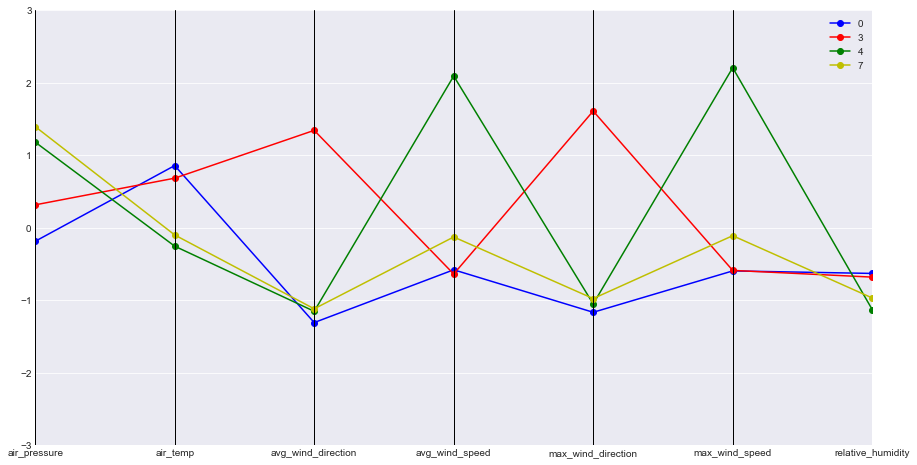

In [16]:
#Dry days
filterRelativeHumidity = (allCenters['relative_humidity'] < -0.5)
showGrafic(allCenters[filterRelativeHumidity])

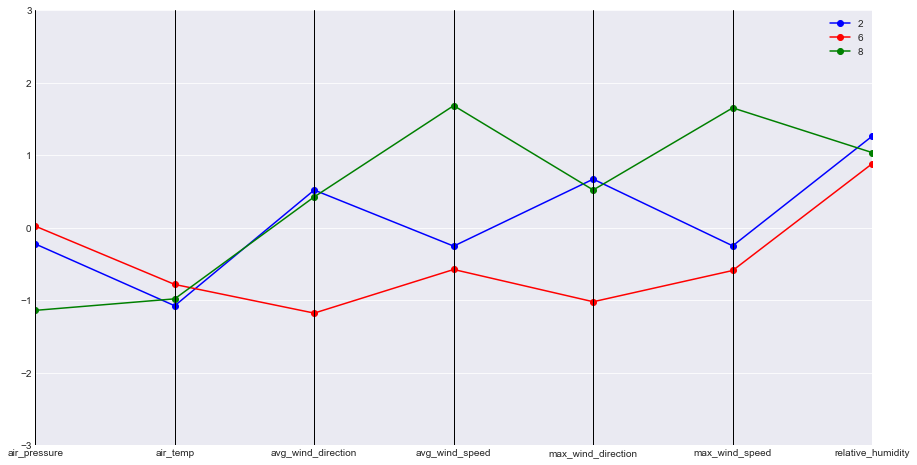

In [17]:
#Warm Days
filterAirTemp = (allCenters['air_temp'] < -0.5)
showGrafic(allCenters[filterAirTemp])

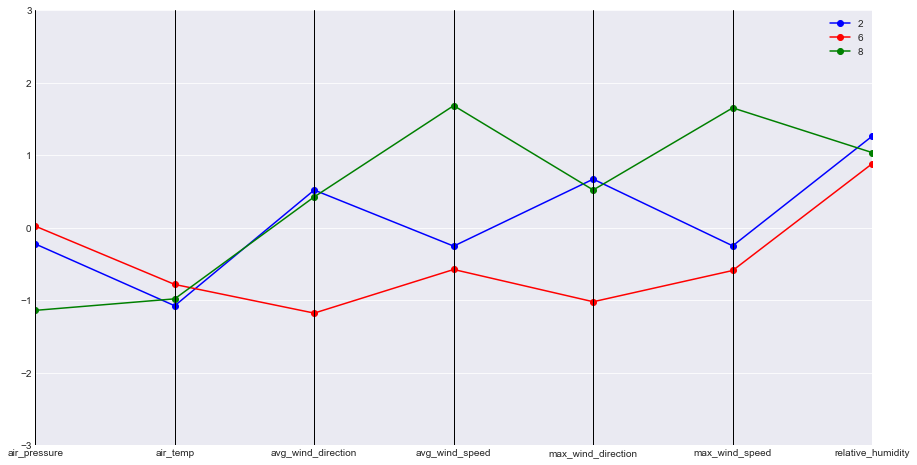

In [18]:
#Cool Days
filterRelativeHumidityAndTemp = (allCenters['relative_humidity'] > 0.5) & (allCenters['air_temp'] < 0.5)
showGrafic(allCenters[(filterRelativeHumidityAndTemp)])